In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units = 16, activation = tf.keras.layers.ReLU()),
    tf.keras.layers.Dense(units = 16, activation = tf.keras.layers.ReLU()),
    tf.keras.layers.Dense(units = 10, activation = tf.keras.layers.Softmax()),
])

model.summary() 
print("Heres how to calculate params : Layerprev shape * Layernext shape" )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Heres how to calculate params : Layerprev shape * Layernext shape


In [4]:
# Print the model summary



***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [17]:
# Build the Sequential convolutional neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = tf.keras.layers.LeakyReLU(), 
                           input_shape = (28,28,1) , data_format = "channels_last",name = "Conv2d1"),
    tf.keras.layers.MaxPooling2D(pool_size = (3,3),name = "MxPool2d1"),
    tf.keras.layers.Flatten(name = "VectRepresentation"), # need to 3dims
    tf.keras.layers.Dense(units = 10, activation = tf.keras.layers.Softmax(),name = "Output_Layer"),
    
],name="KintilModel")
model.summary()

Model: "KintilModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2d1 (Conv2D)             (None, 26, 26, 16)        160       
_________________________________________________________________
MxPool2d1 (MaxPooling2D)     (None, 8, 8, 16)          0         
_________________________________________________________________
VectRepresentation (Flatten) (None, 1024)              0         
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Print the model summary



***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [18]:
# Define the model optimizer, loss function and metrics

METRICS = [tf.keras.metrics.TruePositives(name="TP"),
           tf.keras.metrics.TrueNegatives(name="TF"),
           tf.keras.metrics.FalseNegatives(name="FN"),
           tf.keras.metrics.FalsePositives(name="FP"),
           tf.keras.metrics.CategoricalAccuracy(name= "ACC"),
           tf.keras.metrics.MeanAbsoluteError(name="MAE") 
          ]
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr= 0.005)


model.compile(loss=loss,optimizer=optimizer,metrics=METRICS)

In [6]:
# Print the resulting model attributes
print(f'loss : {model.loss}\n')
print(f"optimizer : {model.optimizer}\n"),
print(f"metrics : {model.metrics}")

loss : <tensorflow.python.keras.losses.SparseCategoricalCrossentropy object at 0x7fabb86e8ba8>

optimizer : <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fabb86a6a90>

metrics : [<tensorflow.python.keras.metrics.TruePositives object at 0x7fabb86e8128>, <tensorflow.python.keras.metrics.TrueNegatives object at 0x7fabb8705898>, <tensorflow.python.keras.metrics.FalseNegatives object at 0x7fabb8705f98>, <tensorflow.python.keras.metrics.FalsePositives object at 0x7fabb8705fd0>, <tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7fabb86a6080>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7fabb86a63c8>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [8]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [9]:
# Print the shape of the training data
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels,num_classes = 10)
train_images.shape , train_labels.shape
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
        'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]


In [14]:
# Rescale the image values so that they lie in between 0 and 1.

print(f"Before Scaling : {train_images[:,:,:][0]}")

train_images = train_images / 255.
print(f"After Scaling : {train_images[:,:,:][0]}")

Before Scaling : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

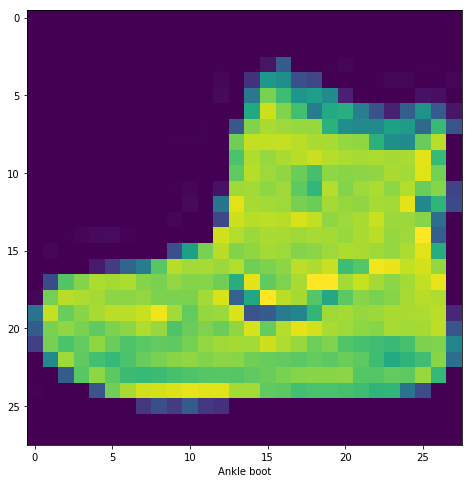

In [41]:
# Display one of the images
plt.figure(figsize=(10,8))
image = train_images[0,:,:]
plt.imshow(image)
plt.xlabel(f"{labels[train_labels[0].argmax(axis = -1)]}")
plt.show()




#### Fit the model

In [19]:
    # Fit the model
import numpy as np
history = model.fit(train_images[...,np.newaxis],train_labels,epochs = 10, batch_size = 1024 )
        

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 890us/sample - loss: 17.1450 - TP: 39597.0000 - TF: 519709.0000 - FN: 20403.0000 - FP: 20291.0000 - ACC: 0.6604 - MAE: 0.0680
Epoch 2/10
60000/60000 [==============================] - 52s 870us/sample - loss: 1.8309 - TP: 47695.0000 - TF: 527984.0000 - FN: 12305.0000 - FP: 12016.0000 - ACC: 0.7965 - MAE: 0.0414
Epoch 3/10
60000/60000 [==============================] - 53s 880us/sample - loss: 1.1885 - TP: 48528.0000 - TF: 529030.0000 - FN: 11472.0000 - FP: 10970.0000 - ACC: 0.8115 - MAE: 0.0390
Epoch 4/10
60000/60000 [==============================] - 52s 867us/sample - loss: 0.8753 - TP: 49233.0000 - TF: 529970.0000 - FN: 10767.0000 - FP: 10030.0000 - ACC: 0.8244 - MAE: 0.0371
Epoch 5/10
60000/60000 [==============================] - 52s 867us/sample - loss: 0.7131 - TP: 49776.0000 - TF: 530720.0000 - FN: 10224.0000 - FP: 9280.0000 - ACC: 0.8355 - MAE: 0.0360
Epoch 6/10
60000/60000 [==================

#### Plot training history

In [20]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,TP,TF,FN,FP,ACC,MAE
0,17.144959,39597.0,519709.0,20403.0,20291.0,0.660350,0.068036
1,1.830878,47695.0,527984.0,12305.0,12016.0,0.796533,0.041380
2,1.188470,48528.0,529030.0,11472.0,10970.0,0.811517,0.038975
3,0.875251,49233.0,529970.0,10767.0,10030.0,0.824433,0.037062
4,0.713090,49776.0,530720.0,10224.0,9280.0,0.835467,0.035953


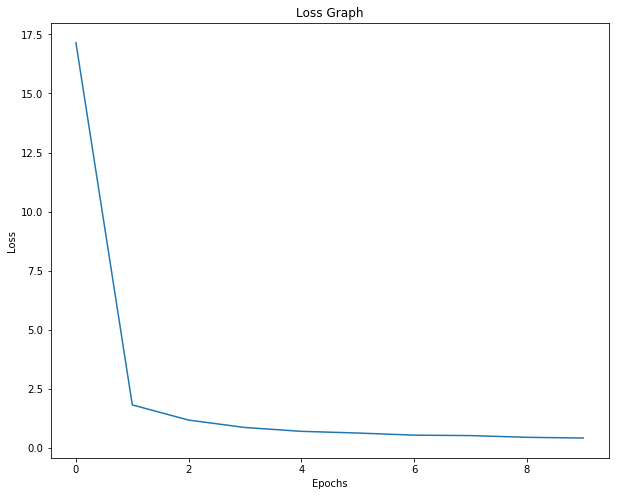

In [30]:
# Make a plot for the loss
f,ax = plt.subplots(ncols = 1,nrows= 1,figsize = (10,8))
ax.plot(df["loss"])
ax.set(title = "Loss Graph", xlabel = "Epochs" , ylabel = "Loss")
plt.show()

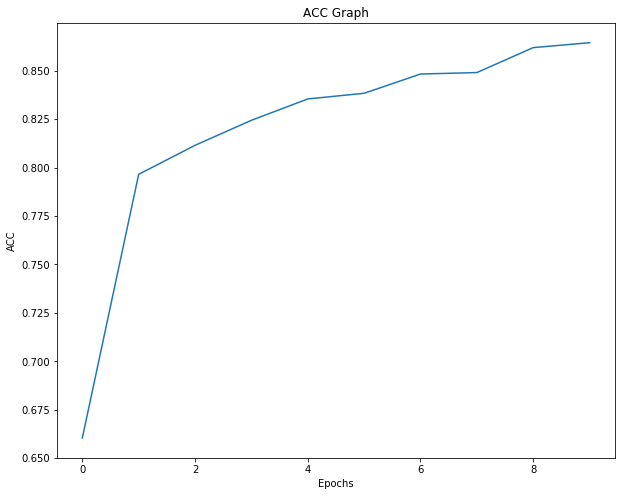

In [32]:
# Make a plot for the accuracy

f,ax = plt.subplots(ncols = 1,nrows= 1,figsize = (10,8))
ax.plot(df["ACC"])
ax.set(title = "ACC Graph", xlabel = "Epochs" , ylabel = "ACC")
plt.show()

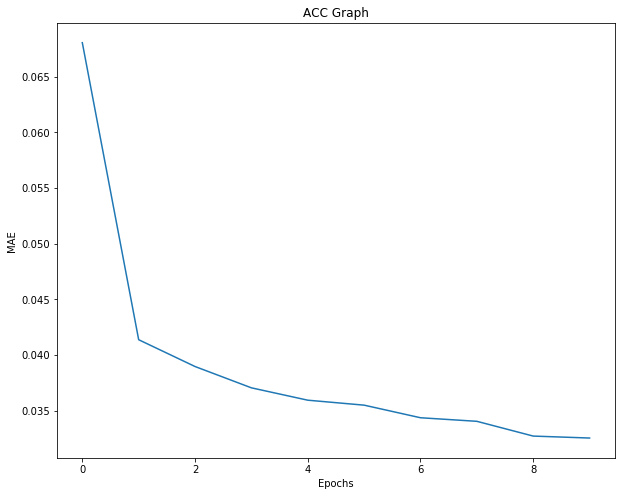

In [33]:
# Make a plot for the additional metric
f,ax = plt.subplots(ncols = 1,nrows= 1,figsize = (10,8))
ax.plot(df["MAE"])
ax.set(title = "ACC Graph", xlabel = "Epochs" , ylabel = "MAE")
plt.show()


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [36]:
# Evaluate the model
test_images = test_images / 255. 
test_labels = to_categorical(test_labels,num_classes = 10)
model.evaluate(test_images[...,np.newaxis],test_labels,verbose = 2)


10000/1 - 6s - loss: 2.3949 - TP: 0.0000e+00 - TF: 90000.0000 - FN: 10000.0000 - FP: 0.0000e+00 - ACC: 0.1000 - MAE: 0.1800


[2.400187931442261, 0.0, 90000.0, 10000.0, 0.0, 0.1, 0.17999992]

#### Make predictions from the model

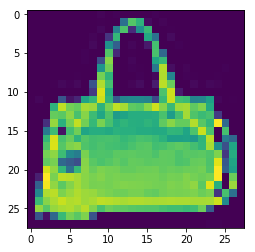

Label: Bag


In [40]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx].argmax(axis = -1)]}")

[[0.08759434 0.10226431 0.05852174 0.11594556 0.05170129 0.11357124
  0.06554703 0.19887072 0.05291018 0.15307362]]
Label :Sneaker


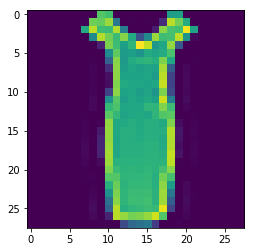

In [67]:
# Get the model predictions
index = np.random.choice(test_images.shape[0])

test_image = test_images[index,:,:]
plt.imshow(test_image)

prediction = model.predict(test_image[np.newaxis,...,np.newaxis])
print(prediction)
print(f"Label :{labels[prediction[0].argmax(axis = -1)]}")